<img src="https://nserc-hi-am.ca/2020/wp-content/uploads/sites/18/2019/12/McGill.png" width="500" height="400" align="left">

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


# INSY 695: Final Group Project
#### Arnaud Guzman-Annès | ID: 260882529
#### Jules Zielinski Babu | ID: 
#### Ram Babu | ID: 260958970
#### Dorothy Zou | ID: 260950477
#### Rameez Rosul | ID: 
#### Johnny Qiao | ID: 

<br>
<br>

**Date: April 1st, 2021**
<br>
<br>

In [44]:
## Initial setup

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.mode.chained_assignment = None  # default='warn'

#display all columns
pd.set_option('display.max_columns', None)

In [45]:
# Sets seed for the entire notebook

np.random.seed(42)

In [46]:
# Import data
#df = pd.read_csv("bankruptcy.csv")
df = pd.read_csv(r"C:\Users\Dell\Desktop\bankrupcy.csv")
bankruptcy = df.copy() # we can use this as raw data afterwards

In [47]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent_liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory_and_accounts_receivable/Net_value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                  6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax       6819 non-null   float64
 4    Operating Gross Margin                                  6819 non-null   float64
 5    Realized Sales Gross Margin                             6819 non-null   float64
 6    Operating Profit Rate                                   6819 non-null   float64
 7    Pre-tax net Interest Rate                               6819 non-null   float64
 8    After-tax net Interest Rate

In [49]:
# Some more information about the dataset

display(df.shape)
display(df.isnull().sum())
display(df.describe())

(6819, 96)

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                    0
 ROA(B) before interest and depreciation after tax         0
 Operating Gross Margin                                    0
                                                          ..
 Liability to Equity                                       0
 Degree of Financial Leverage (DFL)                        0
 Interest Coverage Ratio (Interest expense to EBIT)        0
 Net Income Flag                                           0
 Equity to Liability                                       0
Length: 96, dtype: int64

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent_liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory_and_accounts_receivable/Net_value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [50]:
# Cheking for unique values

display(df[' Liability-Assets Flag'].nunique())
display(df[' Net Income Flag'].nunique())

2

1

In [51]:
# Dropping these 2 columnds

# Liability-Assets Flag
# Net Income Flag

df[[' Liability-Assets Flag']].value_counts() 
df[' Liability-Assets Flag'].corr(df['Bankrupt?'])

#df = df.drop([' Liability-Assets Flag'], axis=1)
df = df.drop([' Net Income Flag'], axis=1)

Text(0, 0.5, 'Number of companies')

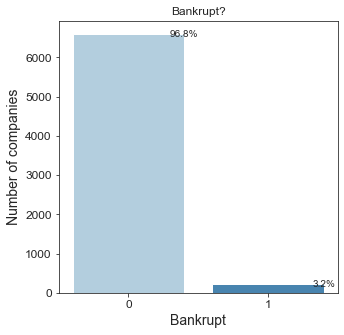

In [52]:
# We are checking for imbalanced data
# Print figure

import seaborn as sns

plt.figure(figsize=(5,5))
splot = sns.countplot(data = df,x = 'Bankrupt?',palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage, (x,y), ha = 'center', va = 'center')
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

In [53]:
# We are going to work later on on this issue.

<AxesSubplot:>

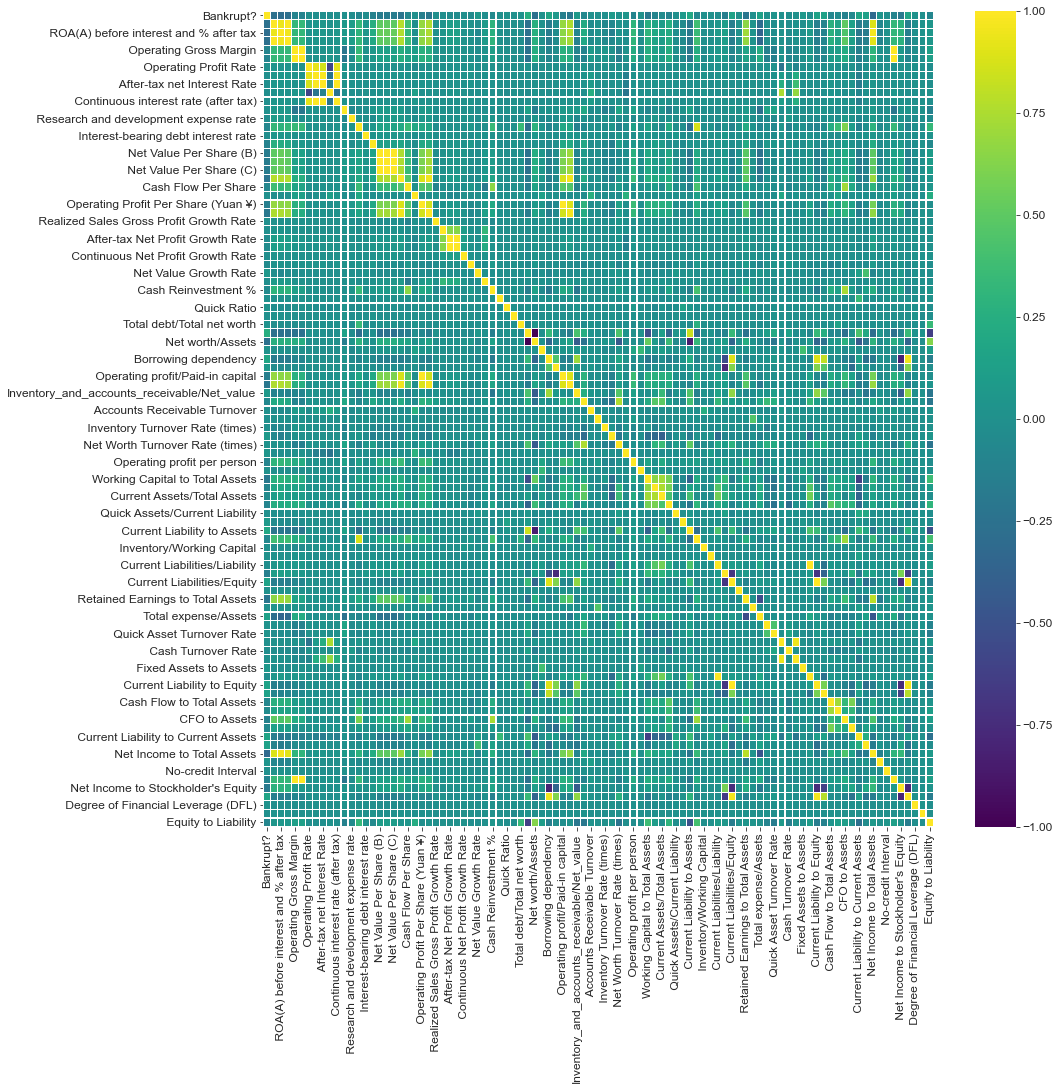

In [54]:
# Correlation

corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

In [55]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return(dataset)


In [56]:
correlation(df, 0.65)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent_liabilities/Net worth,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Long-term Liability to Current Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256970e-04,0.000000e+00,0.458143,7.250730e-04,0.000000,0.147950,0.311664,0.017560,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.002259,0.001208,0.629951,0.021266,0.207576,0.005024,0.390284,0.006479,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.034164,0.392913,0.037135,0.672775,0.166673,0.004094,0.001997,1.473360e-04,0.276920,0.001036,0.676269,2.559237e-02,0.002022,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.637555,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897850e-04,0.000000e+00,0.461867,6.470650e-04,0.000000,0.182251,0.318137,0.021144,0.022080,0.848088,0.689693,0.217620,6.110000e+09,0.000443,0.264516,0.006016,0.004039,0.635172,0.012502,0.171176,0.005059,0.376760,0.005835,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.006889,0.391590,0.012335,0.751111,0.127236,0.014948,0.004136,1.383910e-03,0.289642,0.005210,0.308589,2.394682e-02,0.002226,0.025516,1.065200e-04,7.700000e+09,2.490000e+09,0.468828,0.641100,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361300e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.307102,0.005944,0.022760,0.848094,0.689463,0.217601,7.280000e+09,0.000396,0.264184,0.011543,0.005348,0.629631,0.021248,0.207516,0.005100,0.379093,0.006562,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.028997,0.381968,0.141016,0.829502,0.340201,0.000991,0.006302,5.340000e+09,0.277456,0.013879,0.446027,3.715116e-03,0.002060,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.642765,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078890e-04,0.000000e+00,0.465705,4.490450e-04,0.000000,0.154187,0.321674,0.014368,0.022046,0.848005,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.004194,0.002896,0.630228,0.009572,0.151465,0.005047,0.379743,0.005366,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.015463,0.378497,0.021320,0.725754,0.161575,0.018851,0.002961,1.010646e-03,0.276580,0.003540,0.615848,2.216520e-02,0.001831,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.579039,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860690e-04,0.000000,0

In [57]:
filtered_col = correlation(df, 0.65).columns
df = df[filtered_col]
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent_liabilities/Net worth,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Long-term Liability to Current Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256970e-04,0.000000e+00,0.458143,7.250730e-04,0.000000,0.147950,0.311664,0.017560,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.002259,0.001208,0.629951,0.021266,0.207576,0.005024,0.390284,0.006479,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.034164,0.392913,0.037135,0.672775,0.166673,0.004094,0.001997,1.473360e-04,0.276920,0.001036,0.676269,2.559237e-02,0.002022,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.637555,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897850e-04,0.000000e+00,0.461867,6.470650e-04,0.000000,0.182251,0.318137,0.021144,0.022080,0.848088,0.689693,0.217620,6.110000e+09,0.000443,0.264516,0.006016,0.004039,0.635172,0.012502,0.171176,0.005059,0.376760,0.005835,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.006889,0.391590,0.012335,0.751111,0.127236,0.014948,0.004136,1.383910e-03,0.289642,0.005210,0.308589,2.394682e-02,0.002226,0.025516,1.065200e-04,7.700000e+09,2.490000e+09,0.468828,0.641100,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361300e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.307102,0.005944,0.022760,0.848094,0.689463,0.217601,7.280000e+09,0.000396,0.264184,0.011543,0.005348,0.629631,0.021248,0.207516,0.005100,0.379093,0.006562,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.028997,0.381968,0.141016,0.829502,0.340201,0.000991,0.006302,5.340000e+09,0.277456,0.013879,0.446027,3.715116e-03,0.002060,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.642765,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078890e-04,0.000000e+00,0.465705,4.490450e-04,0.000000,0.154187,0.321674,0.014368,0.022046,0.848005,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.004194,0.002896,0.630228,0.009572,0.151465,0.005047,0.379743,0.005366,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.015463,0.378497,0.021320,0.725754,0.161575,0.018851,0.002961,1.010646e-03,0.276580,0.003540,0.615848,2.216520e-02,0.001831,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.579039,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860690e-04,0.000000,0

<AxesSubplot:>

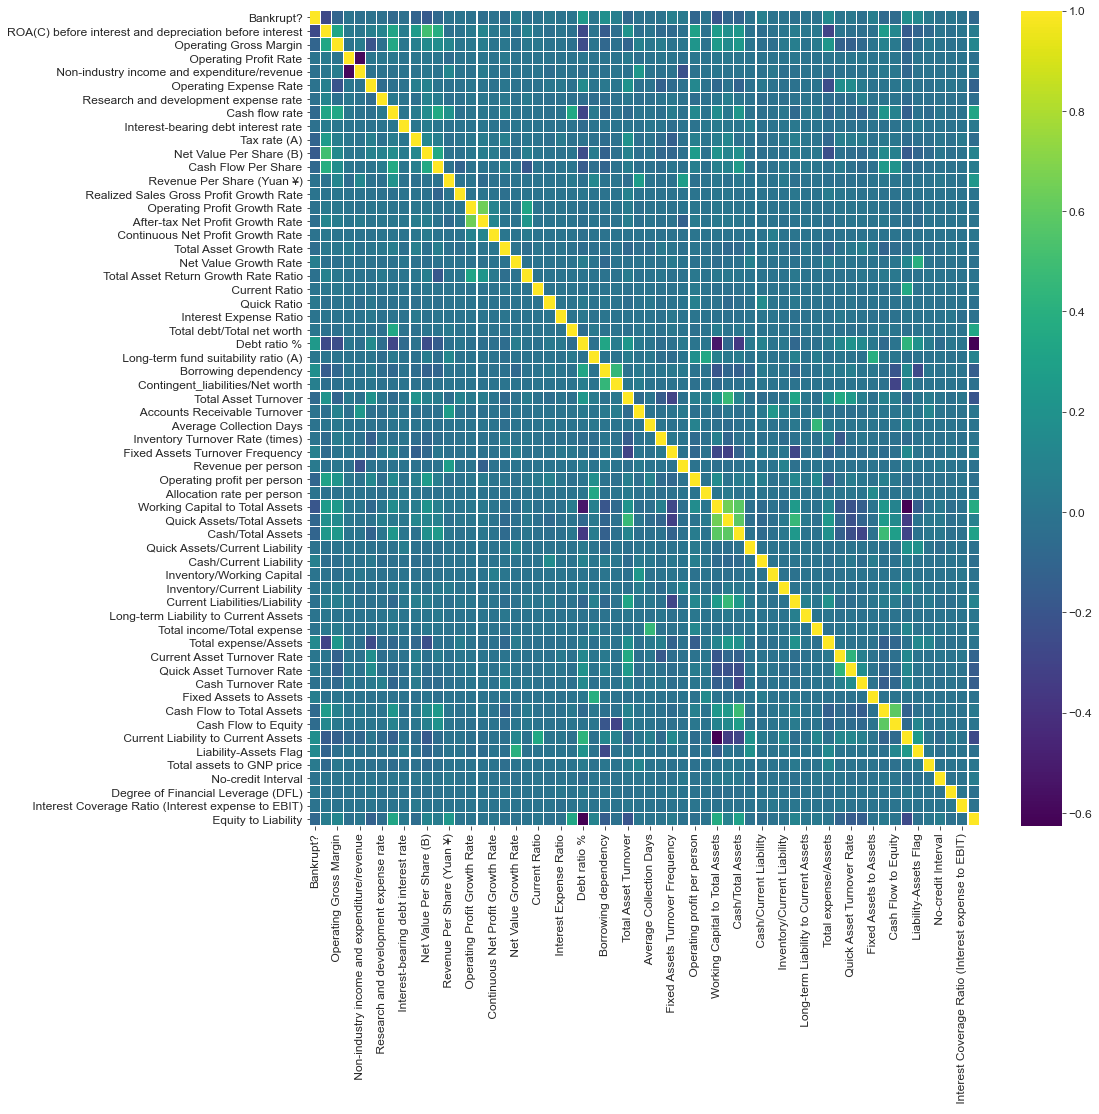

In [58]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

In [59]:
# Variable creation
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

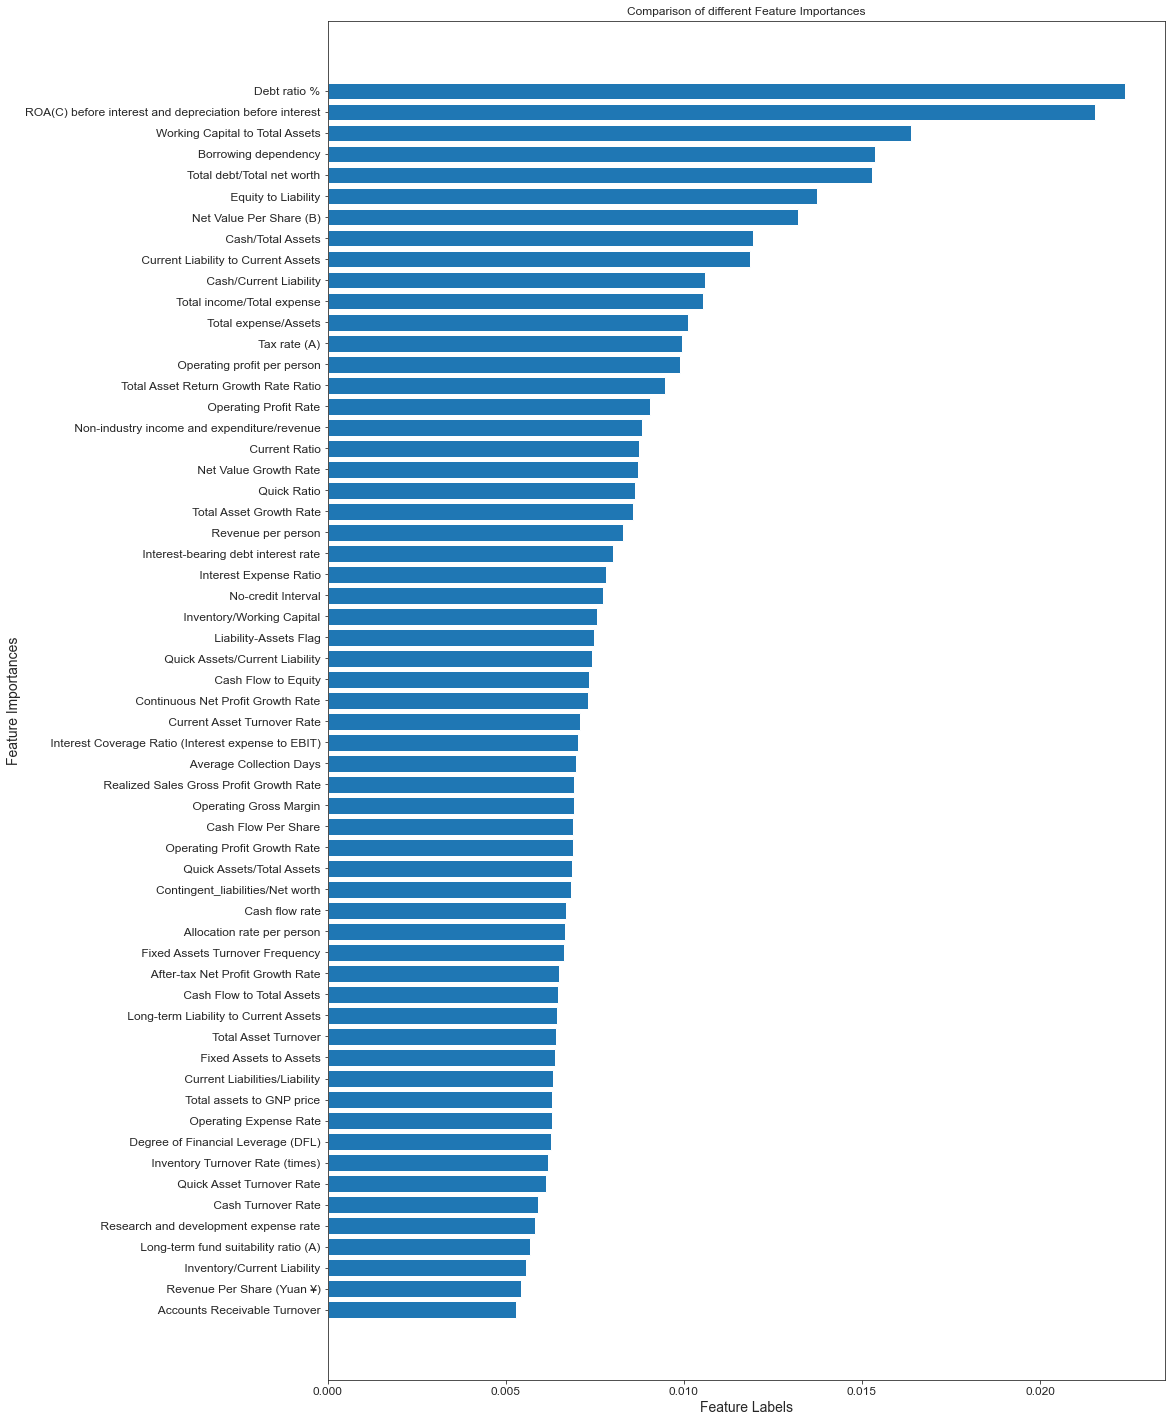

In [60]:
# feature selection (tree-based)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

clf = ExtraTreesClassifier(n_estimators=50, random_state=45)
clf = clf.fit(X, y)
feature_importance = clf.feature_importances_
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        clf.estimators_], 
                                        axis = 0) 

tbfs = pd.DataFrame(
    {"X": X.columns, "FI": feature_importance_normalized}
)

tbfs = tbfs.sort_values('FI',ascending=True)


# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(15,25))
plt.barh(y=tbfs['X'],width=tbfs['FI']) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()


In [61]:
new_col = tbfs['X'][-10:]
X = X[new_col]
X

,Cash/Current Liability,Current Liability to Current Assets,Cash/Total Assets,Net Value Per Share (B),Equity to Liability,Total debt/Total net worth,Borrowing dependency,Working Capital to Total Assets,ROA(C) before interest and depreciation before interest,Debt ratio %
0,1.473360e-04,0.118250,0.004094,0.147950,0.016469,0.021266,0.390284,0.672775,0.370594,0.207576
1,1.383910e-03,0.047775,0.014948,0.182251,0.020794,0.012502,0.376760,0.751111,0.464291,0.171176
2,5.340000e+09,0.025346,0.000991,0.177911,0.016474,0.021248,0.379093,0.829502,0.426071,0.207516
3,1.010646e-03,0.067250,0.018851,0.154187,0.023982,0.009572,0.379743,0.725754,0.399844,0.151465
4,6.804640e-04,0.047725,0.014161,0.167502,0.035490,0.005150,0.375025,0.751822,0.465022,0.106509
...,...,...,...,...,...,...,...,...,...,...
6814,5.071548e-03,0.027951,0.099481,0.175045,0.029890,0.006655,0.373823,0.817769,0.493687,0.124618
6815,4.727181e-03,0.031470,0.080337,0.181324,0.038284,0.004623,0.372505,0.793387,0.475162,0.099253
6816,8.821248e-02,0.007542,0.412885,0.269521,0.097649,0.001392,0.369637,0.866047,0.472725,0.038939
6817,7.133218e-03,0.022916,0.112238,0.213392,0.044009,0.003816,0.369649,0.832340,0.506264,0.086979


In [62]:
display(X.shape)
display(y.shape)

(6819, 10)

(6819,)

In [63]:
#Scaling
from sklearn.preprocessing import StandardScaler
x_col = X.columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X.columns = x_col
#X.apply(pd.to_numeric)
display(X.head())

,Cash/Current Liability,Current Liability to Current Assets,Cash/Total Assets,Net Value Per Share (B),Equity to Liability,Total debt/Total net worth,Borrowing dependency,Working Capital to Total Assets,ROA(C) before interest and depreciation before interest,Debt ratio %
0,-0.072818,2.812493,-0.861820,-1.279247,-0.622067,-0.026226,0.959784,-2.393729,-2.217909,1.750845
1,-0.072818,0.527485,-0.783873,-0.251878,-0.535573,-0.026226,0.129305,-1.067133,-0.673828,1.075727
2,10.391338,-0.199721,-0.884109,-0.381876,-0.621960,-0.026226,0.272560,0.260402,-1.303672,1.749724
3,-0.072818,1.158899,-0.755844,-1.092453,-0.471826,-0.026226,0.312460,-1.496543,-1.735886,0.710131
4,-0.072818,0.525867,-0.789524,-0.693621,-0.241715,-0.026226,0.022791,-1.055083,-0.661778,-0.123674


In [64]:
#Anomaly Detection
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100,contamination=0.01)
pred = iforest.fit_predict(X)
score = iforest.decision_function(X)
from numpy import where
anom_index = where(pred==-1)
values = X.iloc[anom_index]

for i in values.index:
    X = X.drop(i)
    y = y.drop(i)

In [65]:
display(X.shape)
display(y.shape)

(6750, 10)

(6750,)

In [66]:
# Splitting the data set to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [67]:
# pip install imblearn
#!pip install imblearn
#!pip install delayed
#!pip install delayed

In [68]:
# Dealing with imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 0.2)
under = RandomUnderSampler(sampling_strategy = 0.6)

steps = [('o',over),('u',under)]
pipeline = Pipeline(steps = steps)

X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [69]:
display(y_train.shape)
display(X_train.shape)

(2445,)

(2445, 10)

In [70]:
count = 0
for i in y_train:
    if i == 1:
        count +=1
print("There are",count,"cases of bankruptcy and",len(y_train)-count,"of non-bankruptcy")

There are 917 cases of bankruptcy and 1528 of non-bankruptcy


In [71]:
y_train = pd.DataFrame(y_train) 

Text(0, 0.5, 'Number of companies')

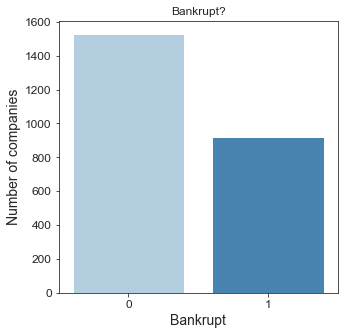

In [72]:
plt.figure(figsize=(5,5))
splot = sns.countplot(data = y_train, x = 'Bankrupt?', palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

In [73]:
"""# Modelling with balanced target 

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train, y_train)

sel = SelectFromModel(model)
sel.fit(X_train, y_train)

selected_feat= X_train.columns[(sel.get_support())]"""

'# Modelling with balanced target \n\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.feature_selection import SelectFromModel\n\nmodel = RandomForestClassifier(n_estimators=1000, n_jobs=-1)\nmodel.fit(X_train, y_train)\n\nsel = SelectFromModel(model)\nsel.fit(X_train, y_train)\n\nselected_feat= X_train.columns[(sel.get_support())]'

In [74]:
#X_train = selected_feat

### Base Model

In [75]:
# Find some classification models and check their baseline accuracy with 10 CV folds

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score


def get_model():
    models = []
    models.append(('LR' , LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('RF' , RandomForestClassifier(n_estimators=100)))
    models.append(('MLP', MLPClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    return models

def bl_performance(X_train, y_train,models):
    results = []
    names = []
    acc = []
    f1 = []
    for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') 
        cv_f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
        results.append(cv_results)
        names.append(name)
        print('{}: CV accuracy mean: {:.4}'.format(name, cv_results.mean()))
        print('{}: CV F1 score mean: {:.4}'.format(name, cv_f1.mean()))
        acc += [cv_results.mean()]
        f1 += [cv_f1.mean()]
        
    result_df = pd.DataFrame()
    result_df['Model'] = ['LR','KNN','SVM','GBC','RF','MLP','LDA']
    result_df['Accuracy'] = acc
    result_df['F1'] = f1
        
    return names, results, result_df

In [76]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results, result_df= bl_performance(X_train, y_train,models)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

LR: CV accuracy mean: 0.8384
LR: CV F1 score mean: 0.3456


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

KNN: CV accuracy mean: 0.904
KNN: CV F1 score mean: 0.3919


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

SVM: CV accuracy mean: 0.8634
SVM: CV F1 score mean: 0.3651


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GBC: CV accuracy mean: 0.8854
GBC: CV F1 score mean: 0.368


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

RF: CV accuracy mean: 0.9337
RF: CV F1 score mean: 0.3852


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

MLP: CV accuracy mean: 0.8634
MLP: CV F1 score mean: 0.3531


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

LDA: CV accuracy mean: 0.8125
LDA: CV F1 score mean: 0.3289


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [77]:
result_df

,Model,Accuracy,F1
0,LR,0.838362,0.345552
1,KNN,0.903968,0.391936
2,SVM,0.863371,0.365109
3,GBC,0.885443,0.367993
4,RF,0.933745,0.385235
5,MLP,0.863354,0.353125
6,LDA,0.812541,0.328898


## MLflow

In [78]:
import numpy as np
from sklearn.linear_model import LogisticRegression

import mlflow
import mlflow.sklearn

if __name__ == "__main__":
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    print("Score: %s" % score)
    mlflow.log_metric("score", score)
    mlflow.sklearn.log_model(lr, "model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

ModuleNotFoundError: No module named 'mlflow'

### Keras Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[10]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
               metrics=['acc',f1_m])

history = model.fit(X_train, y_train, epochs=8,  # epoch=30
                    validation_data=(X_test, y_test))

In [ ]:
X11= X_train[["Debt ratio %","ROA(C) before interest and depreciation before interest","Working Capital to Total Assets","Borrowing dependency","Total debt/Total net worth","Net Value Per Share (B)"]]

In [ ]:
#Preprocessing 
sns.heatmap(X11.isnull(), cbar=False)
X11 = X11.dropna()
X11.info()



In [103]:
#X11.set_index('index', inplace=True)
# Printing the dataframe
X11.reset_index(level=0, inplace=True)
X11

,index,Debt ratio %,ROA(C) before interest and depreciation before interest,Working Capital to Total Assets,Borrowing dependency,Total debt/Total net worth,Net Value Per Share (B)
0,0,-0.138253,-0.293030,-0.026944,-0.064494,-0.026226,-0.609059
1,1,0.998907,0.246033,0.548039,-0.035308,-0.026226,-0.739058
2,2,2.069900,-1.905398,-1.550078,1.449708,-0.026226,-1.195947
3,3,-0.648516,0.319943,-0.120246,-0.192160,-0.026226,-0.288479
4,4,0.854239,-0.593491,-1.044210,0.110694,-0.026226,0.988791
...,...,...,...,...,...,...,...
2440,2440,1.369734,-0.203108,-0.047135,0.401517,-0.026226,-0.570392
2441,2441,1.006338,-2.193153,-0.191022,0.339736,-0.026226,-1.251728
2442,2442,0.938504,-2.151056,-1.984158,0.387963,-0.026226,-0.969772
2443,2443,0.761054,-0.085737,-0.889475,0.273116,-0.026226,-0.496034


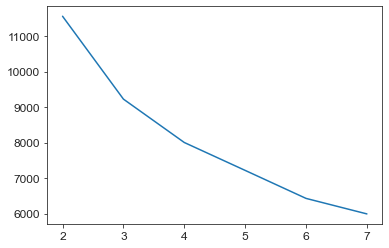

In [104]:
#Elbow process and standarization
from sklearn.preprocessing import StandardScaler
import numpy
scaler = StandardScaler()
X_std11= scaler.fit_transform(X11) 
from sklearn.cluster import KMeans
withinss = []
for i in range (2,8):
     kmeans = KMeans(n_clusters=i)
     model = kmeans.fit(X_std11)
     withinss.append(model.inertia_)
from matplotlib import pyplot
pyplot.plot([2,3,4,5,6,7],withinss)


In [105]:
#silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(X_std11)
labels = model.labels_
from sklearn.metrics import silhouette_samples
silhouette = silhouette_samples(X_std11,labels)
silhouette_avg = silhouette_score(X_std11,labels)
print("The average silhouette_score is :", silhouette_avg)

import pandas
df4 = pandas.DataFrame({'label':labels,'silhouette':silhouette})
print('Average Silhouette Score for Cluster 0: ',np.average(df4[df4['label'] == 0].silhouette))
print('Average Silhouette Score for Cluster 1: ',np.average(df4[df4['label'] == 1].silhouette))
print('Average Silhouette Score for Cluster 2: ',np.average(df4[df4['label'] == 2].silhouette))
#print('Average Silhouette Score for Cluster 3: ',np.average(df4[df4['label'] == 3].silhouette))
#print('Average Silhouette Score for Cluster 4: ',np.average(df4[df4['label'] == 4].silhouette))
#print('Average Silhouette Score for Cluster 5: ',np.average(df4[df4['label'] == 5].silhouette))


The average silhouette_score is : 0.3425142180007943
Average Silhouette Score for Cluster 0:  0.35675715895408133
Average Silhouette Score for Cluster 1:  0.33087881404754366
Average Silhouette Score for Cluster 2:  0.29619210339417446


In [106]:
#silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_std11,labels)

0.3425142180007943

In [107]:
#Data retrival and merger 
def ClusterIndicesComp(clustNum, labels_array): #list comprehension
    return np.array([i for i, x in enumerate(labels_array) if x == clustNum])

In [108]:
ab0=ClusterIndicesComp(0, labels)
dataframe0=pd.DataFrame(ab0, columns=["index"]) 
print (dataframe0)
dataframe0.info()
result0 = pd.merge(dataframe0,X11,on='index',how="left")

      index
0         2
1        32
2        40
3        57
4        83
...     ...
1097   2440
1098   2441
1099   2442
1100   2443
1101   2444

[1102 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   1102 non-null   int32
dtypes: int32(1)
memory usage: 4.4 KB


In [119]:
m0=result0.median()
des0=result0.describe()
des0


,index,Debt ratio %,ROA(C) before interest and depreciation before interest,Working Capital to Total Assets,Borrowing dependency,Total debt/Total net worth,Net Value Per Share (B)
count,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1.102000e+03,1102.000000
mean,1790.665154,1.238501,-1.134466,-0.933455,0.517290,-2.622613e-02,-0.742746
std,506.905953,0.677340,1.064412,0.745397,0.471965,5.371212e-11,0.463204
min,2.000000,-0.798231,-8.325144,-3.204829,-3.238616,-2.622613e-02,-3.624276
25%,1596.250000,0.830539,-1.547974,-1.566413,0.197602,-2.622613e-02,-1.089816
50%,1883.500000,1.300808,-0.934186,-0.858521,0.434001,-2.622613e-02,-0.770641
75%,2163.750000,1.628466,-0.482099,-0.400454,0.742628,-2.622613e-02,-0.430371
max,2444.000000,7.645794,1.192405,2.371080,3.848299,-2.622612e-02,1.323255


In [121]:
ab1=ClusterIndicesComp(1, labels)
dataframe1=pd.DataFrame(ab1, columns=["index"]) 
print (dataframe1)
dataframe1.info()
result1 = pd.merge(dataframe1,X11,on='index',how="left")

      index
0         0
1         1
2         3
3         4
4         5
...     ...
1336   2145
1337   2222
1338   2248
1339   2355
1340   2423

[1341 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   1341 non-null   int32
dtypes: int32(1)
memory usage: 5.4 KB


In [122]:
m1=result1.median()
des1=result1.describe()
des1

,index,Debt ratio %,ROA(C) before interest and depreciation before interest,Working Capital to Total Assets,Borrowing dependency,Total debt/Total net worth,Net Value Per Share (B)
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1.341000e+03,1341.000000
mean,753.649515,-0.243034,0.137729,0.218742,-0.115264,-2.622613e-02,0.126386
std,459.949430,0.816936,0.925925,0.880079,0.201498,2.188245e-11,0.978061
min,0.000000,-1.971838,-3.969261,-2.008165,-0.308082,-2.622613e-02,-1.570798
25%,364.000000,-0.893555,-0.374170,-0.450421,-0.292081,-2.622613e-02,-0.436148
50%,730.000000,-0.208905,0.033943,0.168992,-0.167712,-2.622613e-02,-0.102947
75%,1126.000000,0.384347,0.583449,0.782678,-0.000215,-2.622613e-02,0.389282
max,2423.000000,1.893831,8.154428,2.899712,1.213880,-2.622613e-02,10.291916


In [125]:
ab2=ClusterIndicesComp(2, labels)
dataframe2=pd.DataFrame(ab2, columns=["index"]) 
print (dataframe2)
dataframe2.info()
result2 = pd.merge(dataframe2,X11,on='index',how="left")

   index
0   1639
1   2194
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   2 non-null      int32
dtypes: int32(1)
memory usage: 136.0 bytes


In [126]:
m2=result2.median()
des2=result2.describe()
des2

,index,Debt ratio %,ROA(C) before interest and depreciation before interest,Working Capital to Total Assets,Borrowing dependency,Total debt/Total net worth,Net Value Per Share (B)
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000e+00,2.000000
mean,1916.500000,3.068269,-1.978170,-1.562886,-17.394309,-2.622612e-02,-1.553867
std,392.444264,0.702207,0.177901,0.042605,7.936329,7.403464e-10,0.787888
min,1639.000000,2.571734,-2.103965,-1.593012,-23.006141,-2.622612e-02,-2.110988
25%,1777.750000,2.820002,-2.041068,-1.577949,-20.200225,-2.622612e-02,-1.832427
50%,1916.500000,3.068269,-1.978170,-1.562886,-17.394309,-2.622612e-02,-1.553867
75%,2055.250000,3.316537,-1.915273,-1.547823,-14.588393,-2.622612e-02,-1.275306
max,2194.000000,3.564805,-1.852375,-1.532759,-11.782477,-2.622612e-02,-0.996746
